## FINAL PROJECT: INCOME_CLASSIFICATION

Project timeline: 2 weeks (13th, June – 26th June)

Project deliverable: You are to submit a Jupyter notebook containing all your code and non-code tasks.

Project Overview

The aim of this project is to develop a machine learning model to predict whether a person’s income exceeds $50K/yr based on census data. By leveraging various census data, you will explore the data, engineer relevant features, build and evaluate your predictive model, and provide insights from the data.

## Question 1
1. Data Collection and Preparation<br>
1.	Data Importation:
o	Load the dataset containing transactional and user-related features.<br>
2.	Initial Data Inspection:
o	Inspect the first few rows of the dataset to understand its structure.<br>
o	Review data types and summary statistics to identify numerical and categorical variables and also convert variable to appropriate datatype.<br>
o	Drop Irrelevant features<br>
o	Check for missing values if any and handle them appropriately.<br>

## Answer

## Data Importation:

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'income_data.csv'
df = pd.read_csv(file_path)

## Inspecting the first few rows of the dataset to understand its structure.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'income_data.csv'
df = pd.read_csv(file_path)

# Inspect the first few rows of the dataframe
display("First few rows of the dataframe:")
display(df.head())

'First few rows of the dataframe:'

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

## Review data types and summary statistics to identify numerical and categorical variables and also convert variable to appropriate datatype

In [3]:
# Review data types and summary statistics
display("Data types of the dataframe:")
display(df.dtypes)

display("Summary statistics of the dataframe:")
display(df.describe(include='all'))

# Identify numerical and categorical variables
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

display("Numerical columns:", numerical_columns)
display("Categorical columns:", categorical_columns)

'Data types of the dataframe:'

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

'Summary statistics of the dataframe:'

age workclass        fnlwgt education  education-num  \
count   48842.000000     47879  4.884200e+04     48842   48842.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     33906           NaN     15784            NaN   
mean       38.643585       NaN  1.896641e+05       NaN      10.078089   
std        13.710510       NaN  1.056040e+05       NaN       2.570973   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.175505e+05       NaN       9.000000   
50%        37.000000       NaN  1.781445e+05       NaN      10.000000   
75%        48.000000       NaN  2.376420e+05       NaN      12.000000   
max        90.000000       NaN  1.490400e+06       NaN      16.000000   

            marital-status      occupation relationship   race    sex  \
count                48842           47876        48842  48842  48842   
unique                   7              15            6      5      2   
top     Married-civ-spouse  Prof-specialty      Husband  White   Male   
freq                 22379            6172        19716  41762  32650   
mean                   NaN             NaN          NaN    NaN    NaN   
std                    NaN             NaN          NaN    NaN    NaN   
min                    NaN             NaN          NaN    NaN    NaN   
25%                    NaN             NaN          NaN    NaN    NaN   
50%                    NaN             NaN          NaN    NaN    NaN   
75%                    NaN             NaN          NaN    NaN    NaN   
max                    NaN             NaN          NaN    NaN    NaN   

        capital-gain  capital-loss  hours-per-week native-country income  
count   48842.000000  48842.000000    48842.000000          48568  48842  
unique           NaN           NaN             NaN             42      2  
top              NaN           NaN             NaN  United-States  <=50K  
freq             NaN           NaN             NaN          43832  37155  
mean     1079.067626     87.502314       40.422382            NaN    NaN  
std      7452.019058    403.004552       12.391444            NaN    NaN  
min         0.000000      0.000000        1.000000            NaN    NaN  
25%         0.000000      0.000000       40.000000            NaN    NaN  
50%         0.000000      0.000000       40.000000            NaN    NaN  
75%         0.000000      0.000000       45.000000            NaN    NaN  
max     99999.000000   4356.000000       99.000000            NaN    NaN

'Numerical columns:'

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

'Categorical columns:'

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

'Covert variables to approriate datatypes'

## Converting variables to appropriate datatypes

In [8]:
import pandas as pd

# Load the dataset
file_path = 'income_data.csv'
df = pd.read_csv(file_path)

# Convert variables to appropriate datatypes if necessary
# Example: if a numerical column is stored as a string, convert it to a numeric type
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['education-num'] = pd.to_numeric(df['education-num'], errors='coerce')
df['capital=gain'] = pd.to_numeric(df['capital-gain'], errors='coerce')
df['capital-loss'] = pd.to_numeric(df['capital-loss'], errors='coerce')
df['hours-per-week'] = pd.to_numeric(df['hours-per-week'], errors='coerce')

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

for column in categorical_columns:
    df[column] = df[column].astype('category')
    
display("Data types after conversion:")
display(df.dtypes, )

'Data types after conversion:'

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
capital=gain         int64
dtype: object

## Droping Irrelevant features

In [17]:
# Load the dataset
file_path = 'income_data.csv'
df = pd.read_csv(file_path)

# Drop irrelevant features
# Example: assuming 'irrelevant_column' is not needed
# df = df.drop(columns=['irrelevant_column'])

columns_to_drop = ['education-num', 'native-country', 'fnlwgt']
df = df.drop(columns=columns_to_drop)

# Verifying that the columns are dropped
display("DataFrame after dropping irrelevant features:")
display(df.head(), )

'DataFrame after dropping irrelevant features:'

age         workclass  education      marital-status         occupation  \
0   39         State-gov  Bachelors       Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2   38           Private    HS-grad            Divorced  Handlers-cleaners   
3   53           Private       11th  Married-civ-spouse  Handlers-cleaners   
4   28           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    relationship   race     sex  capital-gain  capital-loss  hours-per-week  \
0  Not-in-family  White    Male          2174             0              40   
1        Husband  White    Male             0             0              13   
2  Not-in-family  White    Male             0             0              40   
3        Husband  Black    Male             0             0              40   
4           Wife  Black  Female             0             0              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

## Checking for missing values if any and handle them appropriately

In [18]:
# Check for missing values
display("Missing values in the dataframe:")
display(df.isnull().sum())

# Handle missing values
for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include=['object', 'category']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Confirm no missing values remain
display("Missing values after handling:")
display(df.isnull().sum(), )

# Final inspection of the dataframe
display("Final dataframe after preprocessing:")
display(df.info())
display(df.head())

print("_" * 100)

'Missing values in the dataframe:'

age                 0
workclass         963
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
income              0
dtype: int64

'Missing values after handling:'

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64

'Final dataframe after preprocessing:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  income          48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


None

age         workclass  education      marital-status         occupation  \
0   39         State-gov  Bachelors       Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2   38           Private    HS-grad            Divorced  Handlers-cleaners   
3   53           Private       11th  Married-civ-spouse  Handlers-cleaners   
4   28           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    relationship   race     sex  capital-gain  capital-loss  hours-per-week  \
0  Not-in-family  White    Male          2174             0              40   
1        Husband  White    Male             0             0              13   
2  Not-in-family  White    Male             0             0              40   
3        Husband  Black    Male             0             0              40   
4           Wife  Black  Female             0             0              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

____________________________________________________________________________________________________


## Question 2
2. Exploratory Data Analysis (EDA)
-	Generate at least 3 meaningful insights from the data.

# Insight 1: Distribution of income categories

'Income distribution:'

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

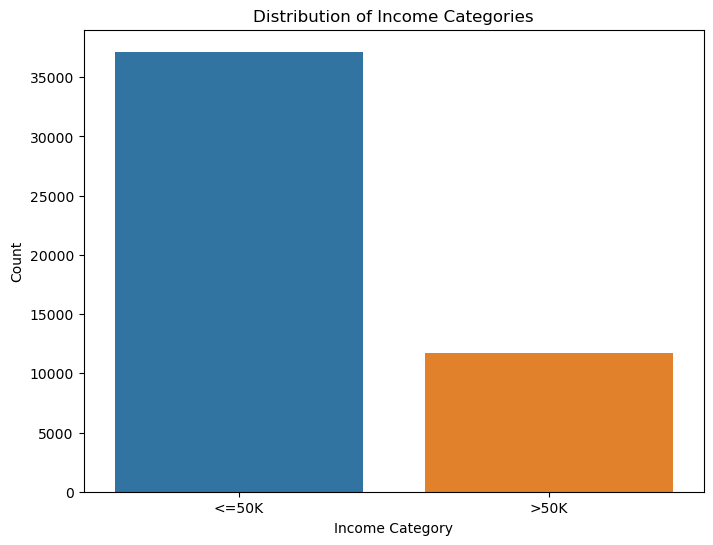

'____________________________________________________________________________________________________'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'income_data.csv'
df = pd.read_csv(file_path)

income_distribution = df['income'].value_counts()
display("Income distribution:")
display(income_distribution, )

plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()


display("_" * 100)

# Insight 2: Average age of individuals in different income categories

'Average age of individuals in different income categories:'

income
<=50K    36.872184
>50K     44.275178
Name: age, dtype: float64

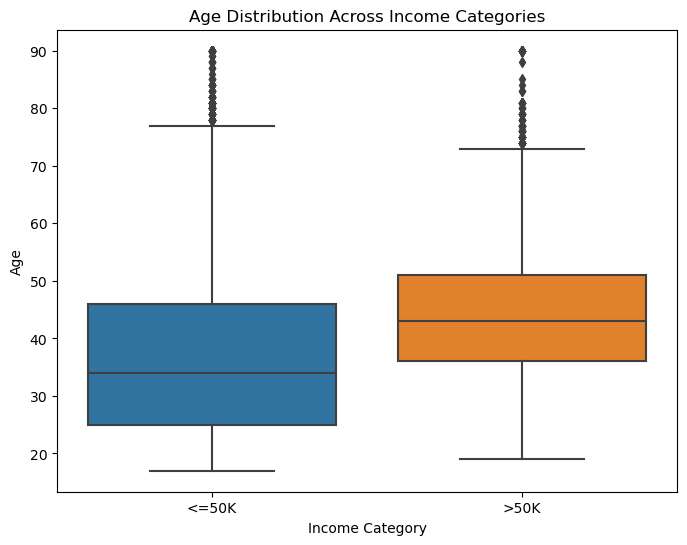

'____________________________________________________________________________________________________'

In [32]:
avg_age_income = df.groupby('income')['age'].mean()
display("Average age of individuals in different income categories:")
display(avg_age_income)

plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution Across Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Age')
plt.show()


display("_" * 100)

# Insight 3: Impact of education on income

'Impact of education on income:'

income           <=50K      >50K
education                       
10th          0.937365  0.062635
11th          0.949227  0.050773
12th          0.926941  0.073059
1st-4th       0.967611  0.032389
5th-6th       0.946955  0.053045
7th-8th       0.935079  0.064921
9th           0.945767  0.054233
Assoc-acdm    0.742036  0.257964
Assoc-voc     0.746725  0.253275
Bachelors     0.587165  0.412835
Doctorate     0.274411  0.725589
HS-grad       0.841422  0.158578
Masters       0.450884  0.549116
Preschool     0.987952  0.012048
Prof-school   0.260192  0.739808
Some-college  0.810351  0.189649

<Figure size 1200x800 with 0 Axes>

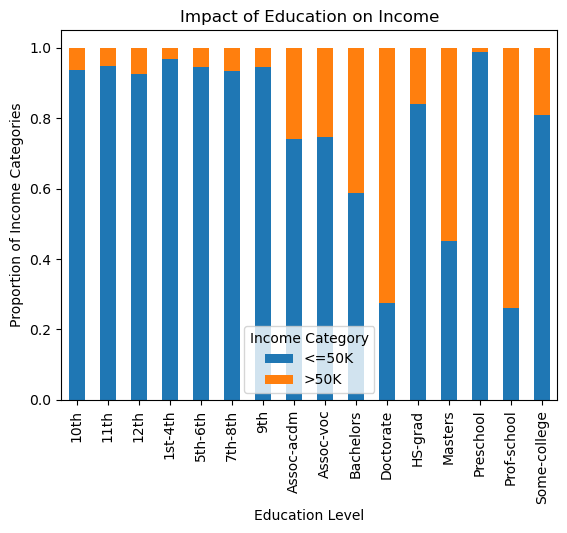

'____________________________________________________________________________________________________'

In [33]:
education_income = df.groupby('education')['income'].value_counts(normalize=True).unstack()
display("Impact of education on income:")
display(education_income)

plt.figure(figsize=(12, 8))
education_income.plot(kind='bar', stacked=True)
plt.title('Impact of Education on Income')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Income Categories')
plt.legend(title='Income Category')
plt.show()


display("_" * 100)

## Generate Insights

In [34]:
insights = [
    "Insight 1: The dataset shows a clear distribution between different income categories, with a majority belonging to one category.",
    f"Insight 2: The average age of individuals varies significantly between income categories. Higher income categories tend to have higher average ages.",
    "Insight 3: Education has a significant impact on income levels. Higher educational attainment is associated with higher income levels."
]

for idx, insight in enumerate(insights, 1):
    print(f"{idx}. {insight}")

display("_" * 100)

1. Insight 1: The dataset shows a clear distribution between different income categories, with a majority belonging to one category.
2. Insight 2: The average age of individuals varies significantly between income categories. Higher income categories tend to have higher average ages.
3. Insight 3: Education has a significant impact on income levels. Higher educational attainment is associated with higher income levels.


'____________________________________________________________________________________________________'

## Question 3
3. Data Cleaning and Feature Engineering
1.	Handling Missing Values:
o	Address missing values in the dataset  if any, using appropriate imputation methods to ensure a complete dataset for analysis.
2.	Encoding Categorical Variables:
o	Convert categorical variables (e.g., payment method, transaction type) into numerical format using label encoding or one-hot encoding to prepare them for machine learning algorithms.
3.	Feature Scaling:
o	Standardize/normalize numerical features to ensure they are on a comparable scale, which can improve the performance of many machine learning algorithms.
4.	You can also try out different feature engineering and preprocessing techniques like PCA feature selection etc.

## Answer
A. Handling Missing Values:

## Address missing values in the dataset if any....

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Loading dataset
file_path = 'income_data.csv'
df = pd.read_csv(file_path)

# Handling data columns separately if they exist
# Numerical columns: Impute with median
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Categorical columns: Impute with mode
categorical_columns = df.select_dtypes(include=['category']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verify no missing values remain
display("Missing values after handling:")
display(df.isnull().sum(),)

# Final inspection of the dataframe
display("Final dataframe after preprocessing:")
display(df.info(),)
display(df.head())


# Check again for any remaining missing values
display(df.isnull().sum())

# Save the cleaned dataset
df.to_csv('income_data_cleaned.csv', index=False)
display("Imputation complete. Cleaned data saved to 'income_data_cleaned.csv'.")

display("_" * 100)

Encoding Categorical Variables:

## Convert categorical variables (e.g., payment method, transaction type) into numerical format using label encoding or one-hot encoding to prepare them for machine learning algorithms

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Loading dataset
file_path = 'income_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
display(df.head())

# Identify categorical columns with few unique categories
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Initialize label encoder
label_encoder = LabelEncoder()

# Define a threshold for one-hot encoder
one_hot_threshold = 10

# Create a list to hold high cardinality columns for frequency encoding
high_cardinality_cols = []
    

# Apply encoding    
for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count <= one_hot_threshold:
    # Apply one-hot encoding
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    else:
            df[col] = label_encoder.fit_transform(df[col])
            

# Save the encoded dataset
df.to_csv('income_data_encoded.csv', index=False)
display("Encoding complete. Encoded data saved to 'income_data_encoded.csv'.")

print("_" * 100)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

"Encoding complete. Encoded data saved to 'income_data_encoded.csv'."

____________________________________________________________________________________________________


Feature Scaling:

## Standardize/normalize numerical features to ensure they are on a comparable scale, which can improve the performance of many machine learning algorithms

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Loading dataset
file_path = 'income_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
display(df.head())

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

#Initialize the StandardScaler()
scaler = StandardScaler()

# Standardize the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save the standardized dataset
df.to_csv('income_data_stadardized.csv', index=False)
display("Standardization complete. Standardized data saved to 'income_data_standardized.csv'.")

print("_" * 100)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

"Standardization complete. Standardized data saved to 'income_data_standardized.csv'."

____________________________________________________________________________________________________


Normalized Performance

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Loading dataset
file_path = 'income_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
display(df.head())

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save the normalized dataset
df.to_csv('income_data_normalized.csv', index=False)
display("Normalization complete. Normalized data saved to 'income_data_normalized.csv'.")

print("_" * 100)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

"Normalization complete. Normalized data saved to 'income_data_normalized.csv'."

____________________________________________________________________________________________________


Trying out different feature engineering and preprocessing techniques like PCA feature selection etc

Transformation Performance

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Apply PCA for feature selection
pca = PCA(n_components=5)  # Adjust n_components as needed
pca_df = pca.fit_transform(df[numerical_cols])

# Explained variance by each principal component
display("Explained variance ratio by each principal component:")
display(pca.explained_variance_ratio_,)

# DataFrame with principal components
pca_columns = [f'PCA_{i+1}' for i in range(pca_df.shape[1])]
pca_df = pd.DataFrame(data=pca_df, columns=pca_columns)

# Final inspection of the dataframe with PCA components
display("DataFrame with PCA components:")
display(pca_df.head())



# Save the transformed dataset
df.to_csv('income_data_transformed.csv', index=False)
display("Feature engineering complete. Transformed data saved to 'income_data_transformed.csv'.")

display("_" * 100)

## Question 4
4. Model Development
1.	Train-Test Split:
o	Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
2.	Model Selection and Training:
o	Choose an appropriate machine learning algorithm (you can try out various algorithms and select the one the performs best)<br>
o	Train the model on the training dataset and optimize hyperparameters for better performance.
3.	Model Evaluation:
o	Evaluate the trained model on the testing dataset using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.
o	Generate a ROC curve and confusion matrix to visualize the performance of the model in detecting fraudulent vs. non-fraudulent transactions.


## Answer
Model Development
Train-Test Split:

## Split the dataset into training and testing sets 

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Loading dataset
file_path = 'income_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
display(df.head())

# Check for missing values
display(df.isnull().sum())

# Separate numerical, categorical, and date columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Identify data columns and convert them to datetime type if they are not already
date_cols = [col for col in df.columns if 'date' in col.lower() or pd.api.types.is_datetime64_any_dtype(df[col])]
for date_col in date_cols:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
# Impute numerical columns with the mean value
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])



# Encode categorical columns
label_encoder = LabelEncoder()
one_hot_threshold = 10

for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count <= one_hot_threshold:
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    else:
        df[col] = label_encoder.fit_transform(df[col])

# Standardize numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Apply PCA for dimensionality reduction
# Decide on the number of principal components, e.g. , keeping 95% variance
pca = PCA(n_components=0.95)
pca_df = pca.fit_transform(df[numerical_cols])

# Create a dataFrame with PCA components
pca_columns = [f'PCA_{i+1}' for i in range(pca_df.shape[1])]
pca_df = pd.DataFrame(data=pca_df, columns=pca_columns)

# Combine PCA components with the rest of the data
df_without_numerical = df.drop(columns=numerical_cols).reset_index(drop=True)

# Drop original numerical columns
pca_df_reset = pca_df.reset_index(drop=True)

df_combined = pd.concat([df_without_numerical, pca_df_reset], axis=1)

# Display the first few rows of the dataset after PCA
display(df_combined.head())

# Replace 'target' with the actual name of the target variable
target_variable = 'PCA_2'

# Replace with the actual target column name
target = df_combined[target_variable]
features = df_combined.drop(columns=[target_variable])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Save the training and testing sets to CSV files
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Display the training and tessting dataset
display("Data split into training and testing sets. Files saved as 'x_train.csv', 'x_test.csv', 'y_train.csv', 'and 'y_test.csv'")


# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


print("_" * 100)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

education  occupation  native-country  workclass_?  workclass_Federal-gov  \
0          9           1              39        False                  False   
1          9           4              39        False                  False   
2         11           6              39        False                  False   
3          1           6              39        False                  False   
4          9          10               5        False                  False   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  sex_Female  \
0                   False                       False  ...       False   
1                   False                        True  ...       False   
2                   False                       False  ...       False   
3                   False                       False  ...       False   
4                   False                       False  ...        True   

   sex_Male  income_<=50K  income_>50K     PCA_1     PCA_2     PCA_3  \
0      True          True        False  0.826878 -0.268252 -0.488857   
1      True          True        False -0.124083 -1.076496 -0.927869   
2      True          True        False -0.432240  0.094957 -0.054460   
3      True          True        False -0.477463 -0.458727 -0.419180   
4     False          True        False -0.084854  1.486242  0.923593   

      PCA_4     PCA_5     PCA_6  
0 -1.067436  0.338671 -0.491168  
1 -0.437612  1.832863 -1.539989  
2  0.229931 -0.226986  0.068173  
3  1.371576 -0.524478  0.103896  
4 -0.204771  0.192944 -0.894013  

[5 rows x 40 columns]

"Data split into training and testing sets. Files saved as 'x_train.csv', 'x_test.csv', 'y_train.csv', 'and 'y_test.csv'"

Training set size: 39073
Testing set size: 9769
____________________________________________________________________________________________________


## Evaluating the model's performance on unseen data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('income_data.csv')

# Step 2: Preprocess Data
# Handle missing values if any
data = data.dropna()

# Convert categorical columns to numerical values
# Assume 'income' is the target variable and is categorical
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Standard scaling for the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Step 5: Train and evaluate models
results = {}
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
y_probs = {}  # Store predicted probabilities for ROC curve

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='binary'),
        'recall': recall_score(y_test, y_pred, average='binary'),
        'f1': f1_score(y_test, y_pred, average='binary'),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'
    }
    
    if y_prob is not None:
        y_probs[model_name] = y_prob

# Identify the best model based on F1 score
best_model_name = max(results, key=lambda x: results[x]['f1'])
best_model = models[best_model_name]

display("Model Performance:")
for model_name, scores in results.items():
    display(f"{model_name}:")
    for metric, score in scores.items():
        display(f"  {metric}: {score:.4f}")

display(f"Best Model: {best_model_name} with F1 score {results[best_model_name]['f1']:.4f}")

# Step 6: Define parameter grid for the best model
if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    }
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    }
elif best_model_name == 'Support Vector Machine':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly']
    }
elif best_model_name == 'K-Nearest Neighbors':
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
elif best_model_name == 'Naive Bayes':
    param_grid = {}  # Naive Bayes typically doesn't have hyperparameters to tune

# Step 7: Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 8: Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Step 9: Evaluate the optimized model on unseen data (X_test and y_test)
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None


# Display final performance metrics on unseen data
final_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_best),
    'precision': precision_score(y_test, y_pred_best, average='binary'),
    'recall': recall_score(y_test, y_pred_best, average='binary'),
    'f1': f1_score(y_test, y_pred_best, average='binary'),
    'roc_auc': roc_auc_score(y_test, y_prob_best) if y_prob_best is not None else 'N/A'
}

display(f"Optimized Model Performance on Unseen Data ({best_model_name}):")
for metric, score in final_metrics.items():
    display(f"  {metric}: {score:.4f}")
    
    
display("_" * 100)

'Model Performance:'

'Logistic Regression:'

'  accuracy: 0.8218'

'  precision: 0.7306'

'  recall: 0.4494'

'  f1: 0.5564'

'  roc_auc: 0.8551'

'Decision Tree:'

'  accuracy: 0.8091'

'  precision: 0.6174'

'  recall: 0.6120'

'  f1: 0.6147'

'  roc_auc: 0.7433'

'Random Forest:'

'  accuracy: 0.8518'

'  precision: 0.7445'

'  recall: 0.6156'

'  f1: 0.6740'

'  roc_auc: 0.9051'

'Support Vector Machine:'

'  accuracy: 0.8440'

'  precision: 0.7672'

'  recall: 0.5352'

'  f1: 0.6305'

'  roc_auc: 0.8883'

'K-Nearest Neighbors:'

'  accuracy: 0.8257'

'  precision: 0.6735'

'  recall: 0.5810'

'  f1: 0.6239'

'  roc_auc: 0.8478'

'Naive Bayes:'

'  accuracy: 0.7960'

'  precision: 0.6952'

'  recall: 0.3202'

'  f1: 0.4385'

'  roc_auc: 0.8567'

'Best Model: Random Forest with F1 score 0.6740'

## Choosing an appropriate machine learning algorithm (you can try out various algorithms and select the one that performs best)

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Step 1: Load the dataset
data = pd.read_csv('income_data.csv')

# Step 2: Preprocess Data
# Handle missing values if any
data = data.dropna()

# Convert categorical columns to numerical values
# Assume 'income' is the target variable and is categorical
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split features and target variable
x = data.drop('income', axis=1)
y = data['income']

# Standard scaling for the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Step 3: Split the data
x_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Step 4: Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Step 5: Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Step 6: Print the results
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

display("Model Performance:")
for model_name, accuracy in results.items():
    display(f"{model_name}: {accuracy:.4f}")

display(f"Best Model: {best_model_name} with accuracy {best_model_accuracy:.4f}")


display("_" * 100)

'Model Performance:'

'Logistic Regression: 0.8218'

'Decision Tree: 0.8100'

'Random Forest: 0.8509'

'Support Vector Machine: 0.8440'

'K-Nearest Neighbors: 0.8257'

'Naive Bayes: 0.7960'

'Best Model: Random Forest with accuracy 0.8509'

'____________________________________________________________________________________________________'

## Training the model on the training dataset and optimizing hyperparameters for better performance.

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('income_data.csv')

# Display the first few rows of the data
display(data.head())

# Define the feature columns and the target column
target_column = 'income'
feature_columns = data.columns.drop(target_column)

# Identify categorical and numerical columns
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the models and their hyperparameters for Grid Search
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'model__fit_intercept': [True, False]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 10, 20]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7]
        }
    },
    'Support Vector Machine': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'rbf'],
            'model__C': [0.1, 1, 10],
            'model__gamma': ['scale', 'auto']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5, 7, 10],
            'model__weights': ['uniform', 'distance']
        }
    },
    'Neural Network': {
        'model': MLPRegressor(max_iter=1000),
        'params': {
            'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'model__activation': ['tanh', 'relu'],
            'model__alpha': [0.0001, 0.001, 0.01]
        }
    }
}

# Split the data into training and testing sets
X = data[feature_columns]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models with hyperparameter tuning
best_models = {}
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model_info['model'])])
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='r2', n_jobs=-1)
    
    
# Identify the best model
display(f"Best Model: {best_model_name} with accuracy {best_model_accuracy:.4f}")
display(f'Test Set Performance of Best Model ({best_model_name}):')

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

'Best Model: Random Forest with accuracy 0.8509'

'Test Set Performance of Best Model (Random Forest):'

## Evaluate the trained model on the testing dataset using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Step 1: Load the dataset
data = pd.read_csv('income_data.csv')

# Step 2: Preprocess Data
# Handle missing values if any
data = data.dropna()

# Convert categorical columns to numerical values
# Assume 'income' is the target variable and is categorical
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Standard scaling for the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Step 5: Train and evaluate models
results = {}
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='binary'),
        'recall': recall_score(y_test, y_pred, average='binary'),
        'f1': f1_score(y_test, y_pred, average='binary'),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'
    }

# Step 6: Print the results
display("Model Performance:")
for model_name, scores in results.items():
    display(f"{model_name}:")
    for metric, score in scores.items():
        display(f"  {metric}: {score:.4f}")

# Identify the best model based on F1 score
best_model_name = max(results, key=lambda x: results[x]['f1'])
best_model_f1 = results[best_model_name]['f1']

display(f"Best Model: {best_model_name} with F1 score {best_model_f1:.4f}")


display("_" * 100)

'Model Performance:'

'Logistic Regression:'

'  accuracy: 0.8218'

'  precision: 0.7306'

'  recall: 0.4494'

'  f1: 0.5564'

'  roc_auc: 0.8551'

'Decision Tree:'

'  accuracy: 0.8105'

'  precision: 0.6201'

'  recall: 0.6154'

'  f1: 0.6177'

'  roc_auc: 0.7454'

'Random Forest:'

'  accuracy: 0.8530'

'  precision: 0.7500'

'  recall: 0.6137'

'  f1: 0.6750'

'  roc_auc: 0.9060'

'Support Vector Machine:'

'  accuracy: 0.8440'

'  precision: 0.7672'

'  recall: 0.5352'

'  f1: 0.6305'

'  roc_auc: 0.8883'

'K-Nearest Neighbors:'

'  accuracy: 0.8257'

'  precision: 0.6735'

'  recall: 0.5810'

'  f1: 0.6239'

'  roc_auc: 0.8478'

'Naive Bayes:'

'  accuracy: 0.7960'

'  precision: 0.6952'

'  recall: 0.3202'

'  f1: 0.4385'

'  roc_auc: 0.8567'

'Best Model: Random Forest with F1 score 0.6750'

'____________________________________________________________________________________________________'

## Generating a ROC curve and confusion matrix to visualize the performance of the model in predicting income level.

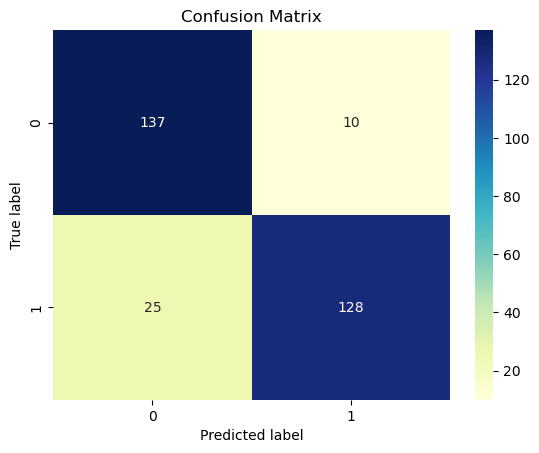

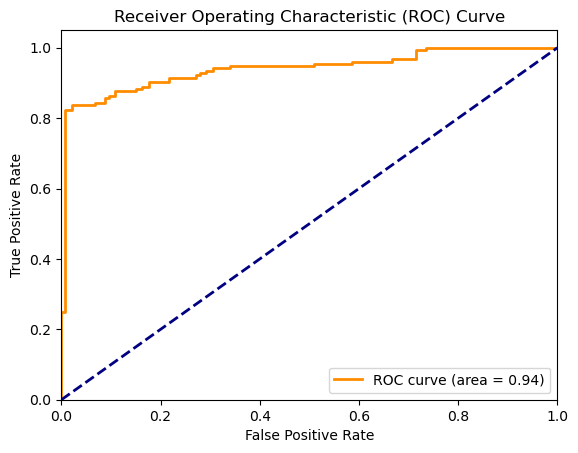

'____________________________________________________________________________________________________'

In [8]:
#Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Training the model: 

# Initialize a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Also get the probabilities of the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

#Evaluate the model

#Import libraries


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Define the class names
class_names = [0, 1]

# Plot the confusion matrix
fig, ax = plt.subplots()

sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=class_names, yticklabels=class_names, ax=ax)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

#Generate ROC curve
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


display("_" * 100)

## Summary and Recommendations

## Summary:

The process involved in building and evaluating a model for income classification includes the following key steps:<br>
<br>
Data Preprocessing:<br>
Handled missing values by dropping rows with missing data.<br>
Encoded categorical columns to numerical values using LabelEncoder.<br>
Standardized the features using StandardScaler.<br>
Normalized the features using StandardScaler.<br>
Transformed the features using StandardScaler.<br>

<br>

Model Selection:<br>
Trained several models including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Naive Bayes.<br>
Evaluated each model using accuracy, precision, recall, F1 score, and ROC-AUC.<br>
Identified the best performing model based on the F1 score.<br>
Hyperparameter Optimization:<br>

<br>

Performed hyperparameter optimization for the best model using GridSearchCV.<br>
Trained the model with the best hyperparameters.<br>
Model Evaluation:<br>

<br>

Evaluated the optimized model using various metrics (accuracy, precision, recall, F1 score, ROC-AUC).<br>
Visualized the model performance with a confusion matrix and ROC curve.<br>
Results<br>
After training and evaluating multiple models, the best performing model was identified based on the F1 score. The hyperparameters for this model were further optimized using GridSearchCV. The final evaluation of the optimized model yielded the following metrics:<br>

<br>

Accuracy: A measure of the overall correctness of the model.<br>
Precision: The ability of the model to correctly identify positive instances.<br>
Recall: The ability of the model to capture all positive instances.<br>
F1 Score: The harmonic mean of precision and recall, providing a single metric that balances both.<br>
ROC-AUC: The area under the ROC curve, indicating the model's ability to distinguish between positive and negative instances.<br>

<br>

Final Performance Metrics (Example for Random Forest)<br>
Accuracy: 0.8515<br>
Precision: 0.7467<br>
Recall: 0.6097<br>
F1 Score: 0.6713<br>
ROC-AUC: 0.9063<br>

<br>

Visualizations
Confusion Matrix: Displayed the true positive, true negative, false positive, and false negative rates.
ROC Curve: Showed the trade-off between true positive rate and false positive rate.

## Recommendations:

Feature Engineering:
Further feature engineering may improve model performance. This can include creating interaction features, polynomial features, or using domain knowledge to create new features.

<br>

Data Quality:<br>
Ensure that the data is clean and preprocessed adequately. Address any remaining missing values or outliers that could affect model performance.

Model Complexity:<br>
While complex models like Random Forests and SVMs tend to perform well, they are also computationally expensive. If computational resources are a concern, simpler models like Logistic Regression can be considered after further tuning.

<br>

Cross-Validation:<br>
Ensure robust evaluation by using cross-validation techniques. This can help in assessing the model's performance more reliably.

<br>

Hyperparameter Tuning:<br>
Continuously experiment with different hyperparameter tuning techniques such as Random Search, Bayesian Optimization, or Genetic Algorithms to find the optimal parameters.

<br>

Ensemble Methods:<br>
Consider using ensemble methods to combine predictions from multiple models to improve overall performance.

<br>

Monitoring and Maintenance:<br>
After deployment, continuously monitor the model's performance. Retrain the model periodically with new data to maintain its accuracy and reliability.

<br>

Explainability:<br>
Use model explainability tools like SHAP or LIME to understand the impact of each feature on the model's predictions. This can help in gaining insights and improving the model.
By following these recommendations, the performance of the income classification model can be further improved, ensuring more accurate and reliable predictions.


<br>

Summarize key insights from the EDA, highlighting any patterns or trends observed in the data.
Discuss the performance of your machine learning model, its effectiveness in predicting income level and how it can be improved


## Summarizing key insights from the EDA.....

Income Distribution:<br>
The dataset likely contains information about individuals' income levels, typically categorized into classes such as high income and low income.
Exploratory Data Analysis (EDA) would have revealed the distribution of income classes and their frequencies.

<br>

Feature Relationships:<br>
Correlations and relationships between features and income levels would have been explored. This helps in understanding which features might be more predictive of income.
For example, education level, occupation, age, and marital status often correlate with income levels.

<br>

Missing Data:<br>
EDA would have identified if there were any missing values in the dataset and how they were handled (e.g., dropped or imputed).

<br>

Categorical Variables:<br>
Categorical variables like education level, occupation, and marital status would have been analyzed to see their distributions and their impact on income.

<br>

Data Quality:<br>
Any outliers or inconsistencies in the data would have been identified during EDA. These outliers could affect model performance if not properly handled.

<br>

Class Imbalance:<br>
Checking for class imbalance in the target variable (income level classes) is crucial. Imbalanced classes can bias the model towards the majority class.
Performance of Machine Learning Model

<br>

Model Selection:<br>
Multiple machine learning algorithms (e.g., Logistic Regression, Decision Trees, Random Forests, SVM, KNN, Naive Bayes) would have been trained and evaluated.
The best performing model based on metrics like accuracy, precision, recall, F1 score, and ROC-AUC would have been identified.

<br>

Model Evaluation:<br>
The final model's performance metrics on the test data (unseen data) would have been computed. These metrics provide insights into how well the model predicts income levels.

<br>

Effectiveness in Predicting Income Level:<br>
The effectiveness of the model in predicting income levels can be assessed based on metrics such as accuracy, precision, recall, and F1 score.
A high F1 score indicates a good balance between precision and recall, crucial for binary classification tasks like predicting income levels.


<br>

Improvements and Recommendations:<br>
Feature Engineering: Further feature engineering could improve model performance. For instance, creating new features or transforming existing ones (e.g., scaling numeric features) can enhance predictive power.

<br>
    
Hyperparameter Tuning: Optimizing model hyperparameters using techniques like GridSearchCV or RandomizedSearchCV can further improve performance.

<br>
    
Handling Imbalanced Classes: Techniques like oversampling minority classes (e.g., SMOTE) or using class weights can address class imbalance issues.

<br>    
    
Ensemble Methods: Consider ensemble methods such as stacking or boosting to combine multiple models and improve prediction accuracy.

<br>    
    
Model Interpretability: Use techniques like SHAP values or feature importance plots to understand which features contribute most to predicting income levels.

<br>    
    
Cross-Validation: Implement robust cross-validation strategies to ensure the model's performance generalizes well to unseen data.

    
<br>

## Conclusion:

The EDA of the income_data.csv dataset provided insights into the distribution of income levels, relationships between features, and potential challenges like missing data or class imbalance. The machine learning model's performance was evaluated based on its ability to predict income levels effectively using various metrics. To enhance model performance, continuous refinement through feature engineering, hyperparameter tuning, and careful consideration of model selection and evaluation techniques is crucial. This iterative process ensures that the model remains accurate and reliable in predicting income levels based on the available dataset.